In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Using the rent prices from appartments in Lausanne restricting to the feature living area.

### Load Data

In [2]:
import pandas as pd
df = pd.read_csv("./data/lausanne-appart.csv")
N  = df.shape[0]
df.head()

living_area  nb_rooms  rent_price
0           69       3.0        1810
1           95       3.5        2945
2           21       1.5         685
3           20       1.0         720
4           33       1.5         830

### Normalization

In [3]:
x0 = df.values[:,0]
x = (x0-np.mean(x0))/np.std(x0)
y0 = df.values[:,2]
y = (y0-np.mean(y0))/np.std(y0)

Text(0, 0.5, 'rent_price')

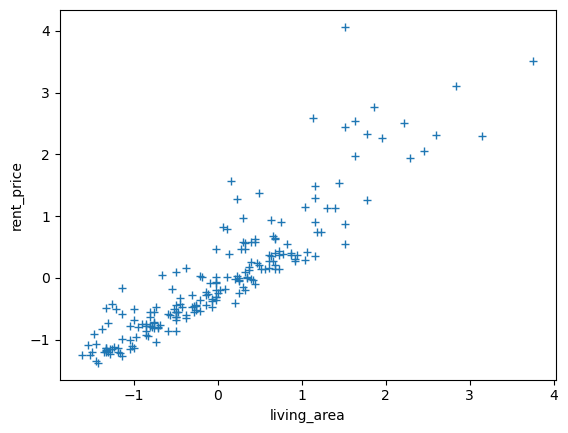

In [4]:
plt.plot(x, y,"+")
plt.xlabel("living_area")
plt.ylabel("rent_price")

### Linear Model, Normal Equations and Closed-form Solution

By denoting the rent prices for given appartments with living area $x_j$ by $y_j$ we assume a linear model 

$\qquad \hat{y}_j = a + b\, x_j$

By minimizing the mean squares error

$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(a,b)$

we can fit the straigth line as follows by using the design matrix $X$ and the data vector $Y$, defined by 

$\qquad X = \left(\begin{array}{cc} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_{N-1}\end{array}\right), \qquad Y = \left(\begin{array}{c} y_0\\ \vdots \\ y_{N-1}\end{array}\right)$

As seen in PW1, the closed-form solution is given by

$\qquad \left(\begin{array}{c}\alpha \\ \beta\end{array}\right) = \left(X^T\cdot X\right)^{-1}\cdot X^T\cdot Y$


tensor([[-1.9602e-16],
        [ 9.0425e-01]], dtype=torch.float64)


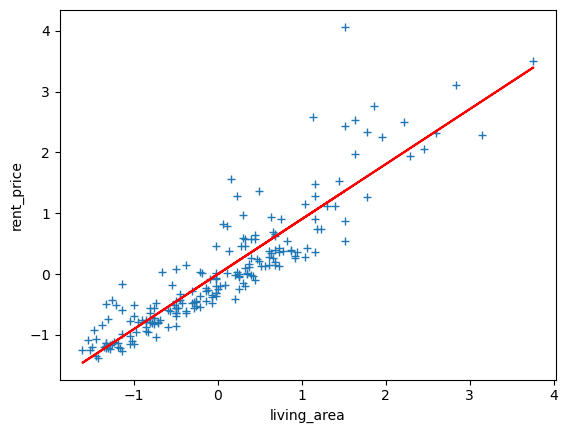

In [5]:
N = x.size

# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
X = torch.cat((torch.ones(N,1),torch.tensor(x).reshape(-1,1)), dim=1)
Y = torch.tensor(y).reshape(-1,1)

# solution of normal equations, 'a' a torch tensor of shape (2,1)
theta_exact = torch.inverse(X.T@X)@X.T@Y

# prediction
Yhat = X@theta_exact

# plot
plt.plot(X[:,1],Y,"+")
plt.plot(X[:,1],Yhat,'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")
print(theta_exact)

#### Cost

In [6]:
def cost(X,Y,theta):
    return torch.mean((Y-X@theta)**2).squeeze().item()    

In [7]:
min_cost = cost(X,Y,theta_exact)
print(min_cost)

0.18233305879162032


### Gradient Descent

Specify the gradient of the cost (w.r.t. $\alpha, \beta$) here as maths expression.

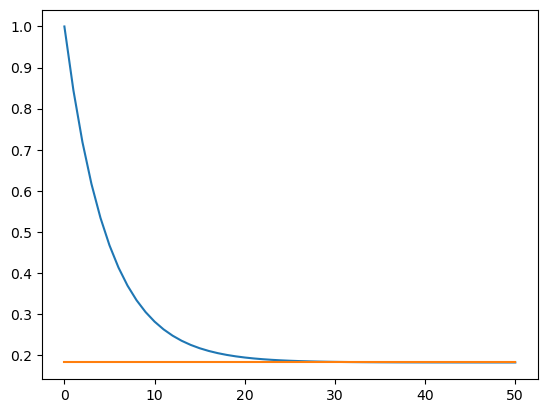

In [8]:
def gradient_cost(X,Y,theta):
    return X.T@(X@theta-Y)/N

nepochs = 50
alpha = 0.1

theta = torch.tensor([0.0,0.0], dtype=torch.float64).reshape(2,1)

costs = [cost(X,Y,theta)]
for epoch in range(nepochs):
    theta = theta - alpha * gradient_cost(X,Y,theta)
    costs.append(cost(X,Y,theta))
    
plt.plot(range(nepochs+1),costs)
plt.plot(range(nepochs+1),min_cost*torch.ones(nepochs+1))


#### Using PyTorch's autograd

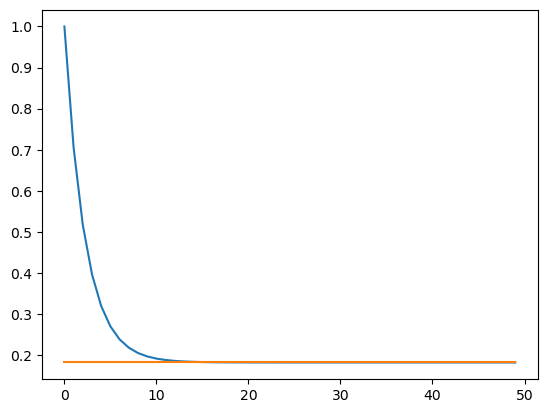

In [9]:
nepochs = 50
alpha = 0.1

def predict(X, theta):
    return 
    
loss = torch.nn.MSELoss()
theta = torch.tensor([0.0,0.0], dtype=torch.float64, requires_grad=True).reshape(2,1)
theta.retain_grad()
#optimizer = torch.optim.SGD(theta, lr=alpha)
costs = []

for epoch in range(nepochs):
    target = X@theta
    c = loss(Y, target)
    costs.append(c.item())    
    c.backward()
    
    with torch.no_grad():
        theta -= alpha * theta.grad    
        theta.grad=None
    
plt.plot(range(nepochs),costs)
plt.plot(range(nepochs),min_cost*torch.ones(nepochs))


In [10]:
#help(torch.optim.SGD)